# 1. Import library
Note: Combined from various sources, much more comprehensive than the original code provided. Import 也很讲究 XDXD

Also note: For this "Ab_Virus_01_Data_Preprocessing_v01.ipynb" Jupyter Notebook, you have to run it in the <b>"my-rdkit-env"<b> environment.

### 1.1 Import RDKit

In [1]:
from rdkit import Chem

### 1.2 Import OS and Path

In [2]:
import os
from pathlib import Path

### 1.3 Import data structures

In [3]:
import pandas as pd

# 2. Import csv file as panda df

In [4]:
df = pd.read_csv('CoV-AbDab_extract.csv')

In [5]:
df.sample(30)

,Index,AB_name,Class,Paratope,Epitope
250,251,Nb34,1,QGKGREWYASSRSEFD,VYNSAFSTFKCWNNV
166,167,Asarnow_5A6,1,TSSYEVISYDSNYRITMVRGEISYYSGSYNLR,YLLTEICNGVKGFNCYFPLQS
292,293,C118,1,QVGFTSNYYYTGYYGDYKNGSHSKGD,LYNSAFSTFKCYGVSPTKGDVRQAPGQTPDDFTVGYY
164,165,VHH_V,1,QGKGLEWYEQDYEGSLGGWGRDFGSW,LYNSASFSTFKCYGVSPGDVRAQVWNNNVGQY
257,258,P008_056,1,EVGFSYYIYSNRPYDSSNDYDISNYYDSNLETGVSGSHDS,AIHEKSNRNATVYYHKNNKSWMELMDLEGKQGNFKVTAGA
123,124,BD-812,1,LISWIYDDDKYYGRYYNSAL,TRNNLDSKVGGNYNQPTYGQR
162,163,VHH_U,1,YYSAQSGSYYWDHEE,LYNSASFSTFKCSPTGNGVGQY
276,277,Beta-44,1,TSYWWSYNNGELLYLYSSTW,ASTPCVKGFNCY
221,222,ab1,1,VGFTSSNYYSGGSYRGYDYDYSVSSYWQGSS,RDERQTGNDYLFRKSNYAGSFNYQY
200,201,CV2-75,1,YYYYSSRPDGNLGSKTDDNSWSD,YNFSTFKCYGVSPTKNVGYQY


# 3. Convert FASTA sequences to Molecular and Atomic representation, and finally to one-hot vector
One-hot vector in dimension of 310 molecules X 239 atoms X 37 atomic features

In [6]:
mol_ab = []
for i in range (len(df['Paratope'])):
    mol = Chem.MolFromFASTA(df['Paratope'].loc[i])
    mol_ab.append(mol)
print(len(mol_ab))

310


In [7]:
mol_virus = []
for i in range (len(df['Epitope'])):
    mol = Chem.MolFromFASTA(df['Epitope'].loc[i])
    mol_virus.append(mol)
print(len(mol_virus))

310


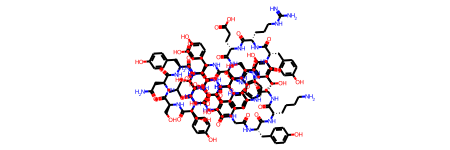

In [8]:
# Visualise a molecule:

mol = mol_ab[25]
mol

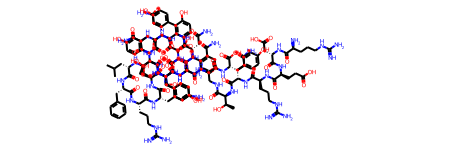

In [9]:
# Visualise a molecule:

mol = mol_virus[25]
mol